In [91]:
from matplotlib import pyplot as plt
import numpy as np

from analysis import session
from sess_util import sess_gen_util

In [120]:
# path to data directory
datadir = '../data/AIBS'
mouse_df = 'mouse_df.csv'

In [138]:
sess = session.Session(datadir, 764704289)                       
sess.extract_sess_attribs()                                             
sess.extract_info(fulldict=False) 


Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in ../data/AIBS/prod/mouse_413663/ophys_session_764704289
Loading ROI trace info...
Loading sync h5 info...
Creating stimulus objects...


In [139]:
print(f'number of rois: {sess.nrois}')
print(f'mouse number: {sess.mouse_n}')
print(f'mouse ID: {sess.mouseid}')
print(f'gabor object: {sess.gabors}')
print(f'gabor orientation standard deviation(s): {sess.gabors.ori_std}')
print(f'2p frames per sec: {sess.twop_fps:.2f}')
print(f'pupil frames per sec: {sess.pup_fps:.2f}')
print(f'stimulus frames per sec: {sess.stim_fps:.2f}')

number of rois: 644
mouse number: 6
mouse ID: 413663
gabor object: <analysis.session.Gabors object at 0x7efbc9de9390>
gabor orientation standard deviation(s): 0.25
2p frames per sec: 30.08
pupil frames per sec: 30.00
stimulus frames per sec: 60.00


In [144]:
# get all segment numbers where stim obeys specific criteria (E)
gab_seg_ns = sess.gabors.get_segs_by_criteria(gabk=16, gabfr=2, surp=1, by='seg')

In [145]:
# get the frames numbers corresponding to the segment starts
pre = 1.0
post = 1.0
twop_fr_ns = sess.gabors.get_twop_fr_by_seg(gab_seg_ns, first=True, ch_fl=[pre, post])
stim_fr_ns = sess.gabors.get_stim_fr_by_seg(gab_seg_ns, first=True, ch_fl=[pre, post])

In [148]:
# get the ROI data around the specified frame numbers (ROI x seq x frame)
xran, data_array = sess.gabors.get_roi_trace_array(twop_fr_ns, pre, post, stand=True)

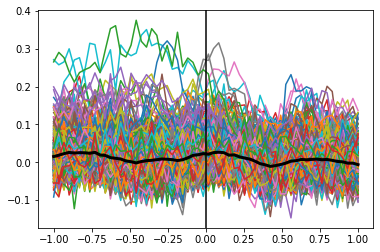

In [149]:
# plot each ROIs mean activity across sequences
fig, ax = plt.subplots(1)
_ = ax.plot(xran, np.mean(data_array, axis=1).T)
_ = ax.plot(xran, np.mean(np.mean(data_array, axis=1).T, axis=1), lw=3, c='k')
_ = ax.axvline(0, c='k')

In [85]:
# get all segment numbers where stim obeys specific criteria
bri_seg_ns = sess.bricks.get_segs_by_criteria(bri_size=128, surp=1, remconsec=True, by='seg')

In [86]:
# get the frames numbers corresponding to the segment starts
pre = 1.0
post = 1.0
twop_fr_ns = sess.bricks.get_twop_fr_by_seg(bri_seg_ns, first=True, ch_fl=[pre, post])
stim_fr_ns = sess.bricks.get_stim_fr_by_seg(bri_seg_ns, first=True, ch_fl=[pre, post])

In [87]:
# get the ROI data around the specified frame numbers (ROI x seq x frame)
xran, data_array = sess.bricks.get_roi_trace_array(twop_fr_ns, pre, post, stand=True)

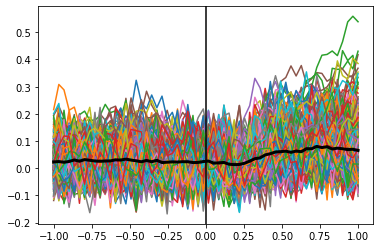

In [88]:
# plot each ROIs mean activity across sequences
fig, ax = plt.subplots(1)
_ = ax.plot(xran, np.mean(data_array, axis=1).T)
_ = ax.plot(xran, np.mean(np.mean(data_array, axis=1).T, axis=1), lw=3, c='k')
_ = ax.axvline(0, c='k')

In [116]:
# Retrieve session info corresponding to desired criteria
omit_sess, omit_mice = sess_gen_util.all_omit(runtype='prod') # no more details needed for production
mouse_ns, sess_ns, sessids = sess_gen_util.get_sess_vals(mouse_df, ['mouse_n', 'sess_n', 'sessid'], sess_n=[1, 2, 3],
                                   runtype='prod', omit_sess=omit_sess, 
                                   omit_mice=omit_mice)

In [124]:
print('\n'.join([f'mouse {m}: {sid} (session {n})' for m, sid, n in zip(mouse_ns, sessids, sess_ns)]))


mouse 1: 758519303 (session 1)
mouse 1: 759189643 (session 2)
mouse 1: 759660390 (session 3)
mouse 3: 761624763 (session 1)
mouse 3: 761944562 (session 2)
mouse 3: 762250376 (session 3)
mouse 4: 760260459 (session 1)
mouse 4: 760659782 (session 2)
mouse 4: 761269197 (session 3)
mouse 6: 764704289 (session 1)
mouse 6: 765193831 (session 2)
mouse 6: 766502238 (session 3)
mouse 7: 777914830 (session 1)
mouse 7: 778864809 (session 2)
mouse 7: 779650018 (session 3)
mouse 8: 777496949 (session 1)
mouse 8: 778374308 (session 2)
mouse 8: 779152062 (session 3)
mouse 9: 826187862 (session 1)
mouse 9: 826773996 (session 2)
mouse 9: 827833392 (session 3)
mouse 10: 826338612 (session 1)
mouse 10: 826819032 (session 2)
mouse 10: 828816509 (session 3)
mouse 11: 823453391 (session 1)
mouse 11: 824434038 (session 2)
mouse 11: 825180479 (session 3)
mouse 12: 826659257 (session 1)
mouse 12: 827300090 (session 2)
mouse 13: 832883243 (session 1)


In [121]:
sessions = sess_gen_util.init_sessions(sessids, datadir, mouse_df, fulldict=False, omit=True, )


Creating session 758519303...

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in ../data/AIBS/prod/mouse_408021/ophys_session_758519303
Loading ROI trace info...
Loading sync h5 info...
Creating stimulus objects...
Finished session 758519303.

Creating session 759189643...

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in ../data/AIBS/prod/mouse_408021/ophys_session_759189643
Loading ROI trace info...

WARNING for session 759189643: SKIPPING DUE TO corrupted dff file.

Creating session 759660390...

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in ../data/AIBS/prod/mouse_408021/ophys_session_759660390
Loading ROI trace info...
Loading sync h5 info...
Creating stimulus objects...
Finished session 759660390.

Creating session 761624763...

Loading stimulus dictionary...
Loading alignment da

Loading sync h5 info...
Creating stimulus objects...
Finished session 824434038.

Creating session 825180479...

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in ../data/AIBS/prod/mouse_433451/ophys_session_825180479
Loading ROI trace info...
Loading sync h5 info...
Creating stimulus objects...
Finished session 825180479.

Creating session 826659257...

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in ../data/AIBS/prod/mouse_433458/ophys_session_826659257
Loading ROI trace info...
Loading sync h5 info...
Creating stimulus objects...
Finished session 826659257.

Creating session 827300090...

Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in ../data/AIBS/prod/mouse_433458/ophys_session_827300090
Loading ROI trace info...
Loading sync h5 info...
Creating stimulus objects...
Finished session 

In [127]:
for sess in sessions:
    print(f'Session ID: {sess.sessid} (mouse {sess.mouse_n}, session {sess.sess_n})')
    for stimtype in ['bricks', 'gabors']:
        stim = sess.get_stim(stimtype)
        segs = stim.get_segs_by_criteria(bri_size=128, surp=1, gabk=16, gabfr=3, 
                                  by='seg', remconsec=(stimtype == 'bricks'))
        print(f'    {stimtype}: {len(segs)} sequences')

Session ID: 758519303 (mouse 1, session 1)
    bricks: 31 sequences
    gabors: 94 sequences
Session ID: 759660390 (mouse 1, session 3)
    bricks: 33 sequences
    gabors: 105 sequences
Session ID: 761624763 (mouse 3, session 1)
    bricks: 34 sequences
    gabors: 97 sequences
Session ID: 761944562 (mouse 3, session 2)
    bricks: 30 sequences
    gabors: 99 sequences
Session ID: 762250376 (mouse 3, session 3)
    bricks: 35 sequences
    gabors: 99 sequences
Session ID: 760260459 (mouse 4, session 1)
    bricks: 32 sequences
    gabors: 82 sequences
Session ID: 760659782 (mouse 4, session 2)
    bricks: 29 sequences
    gabors: 91 sequences
Session ID: 761269197 (mouse 4, session 3)
    bricks: 34 sequences
    gabors: 89 sequences
Session ID: 764704289 (mouse 6, session 1)
    bricks: 33 sequences
    gabors: 96 sequences
Session ID: 765193831 (mouse 6, session 2)
    bricks: 34 sequences
    gabors: 98 sequences
Session ID: 766502238 (mouse 6, session 3)
    bricks: 29 sequences
 

In [128]:
session_dicts = sess_gen_util.get_sess_info(sessions, )

In [130]:
session_dicts.keys()

dict_keys(['mouse_ns', 'mouseids', 'sess_ns', 'sessids', 'lines', 'planes', 'nrois', 'twop_fps', 'nanrois', 'nanrois_dff'])

In [150]:
from sess_util import sess_ntuple_util

In [151]:
analyspar = sess_ntuple_util.init_analyspar(

In [152]:
analyspar

AnalysPar(fluor='dff', remnans=True, stats='mean', error='sem', scale=False, dend='extr')

In [153]:
from sess_util import sess_str_util

In [172]:
stim_par = sess_str_util.stim_par_str(stimtype='bricks', bri_dir='both', bri_size=128, gabk=16, str_type='file')

In [173]:
stim_par

'bri_both'

In [190]:
fluor_str = sess_str_util.fluor_par_str(str_type='print')

In [191]:
fluor_str

'ΔF/F'